In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data,boston.target
print (X.shape, y.shape)

(506, 13) (506,)


In [3]:
from sklearn.linear_model import LinearRegression
hypothesis = LinearRegression(normalize=True) 
hypothesis.fit(X,y)
print (hypothesis.coef_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [7]:
def hashing_trick(input_string, vector_size=20): 
  feature_vector = [0] * vector_size
  for word in input_string.split(' '):
    index = abs(hash(word)) % vector_size
    feature_vector[index] = 1
  return feature_vector

In [9]:
sklearn_hashing_trick = txt.HashingVectorizer( n_features=20, binary=True, 
norm=None)
text_vector = sklearn_hashing_trick.transform( ['Python for data science','Python for machine learning']) 
text_vector

NameError: ignored

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data,digits.target
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
%timeit single_core_learning = cross_val_score(SVC(), X,y, cv=20, n_jobs=1)
%timeit multi_core_learning = cross_val_score(SVC(), X, y, cv=20, n_jobs=-1)

1 loop, best of 3: 2.62 s per loop
1 loop, best of 3: 1.65 s per loop


In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
import pandas as pd
import numpy as np
print ('Your pandas version is: %s' % pd.__version__)
print ('Your NumPy version is %s' % np.__version__)
iris_nparray = iris.data
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names) 
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in iris.target], 
dtype="category")

Your pandas version is: 1.1.3
Your NumPy version is 1.18.5


In [15]:
print (iris_dataframe.mean(numeric_only=True) )
print (iris_dataframe.median(numeric_only=True))

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


In [16]:
print (iris_dataframe.std()) 
print (iris_dataframe.max(numeric_only=True)-iris_dataframe.min(numeric_only=True))

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64
sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64


In [17]:
iris_dataframe.quantile(np.array([0,.25,.50,.75,1]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [18]:
from scipy.stats import kurtosis, kurtosistest
k = kurtosis(iris_dataframe['petal length (cm)'])
zscore, pvalue = kurtosistest(iris_dataframe['petal length (cm)'])
print ('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis -1.396 z-score -14.823 p-value 0.000


In [19]:
from scipy.stats import skew, skewtest
s = skew(iris_dataframe['petal length (cm)'])
zscore, pvalue = skewtest(iris_dataframe['petal length (cm)'])
print ('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s, zscore, pvalue))

Skewness -0.272 z-score -1.400 p-value 0.162


In [20]:
iris_binned = pd.concat([
pd.qcut(iris_dataframe.iloc[:,0], [0, .25, .5, .75, 1]),
pd.qcut(iris_dataframe.iloc[:,1], [0, .25, .5, .75, 1]),
pd.qcut(iris_dataframe.iloc[:,2], [0, .25, .5, .75, 1]),
pd.qcut(iris_dataframe.iloc[:,3], [0, .25, .5, .75, 1]),
], join='outer', axis = 1)

In [21]:
print(iris_dataframe['group'].value_counts())
print(iris_binned['petal length (cm)'].value_counts())
print(iris_binned.describe())

virginica     50
versicolor    50
setosa        50
Name: group, dtype: int64
(0.999, 1.6]    44
(4.35, 5.1]     41
(5.1, 6.9]      34
(1.6, 4.35]     31
Name: petal length (cm), dtype: int64
                sepal length (cm)  ... petal width (cm)
count                         150  ...              150
unique                          4  ...                4
top     (4.2989999999999995, 5.1]  ...     (0.099, 0.3]
freq                           41  ...               41

[4 rows x 4 columns]


In [22]:
print (pd.crosstab(iris_dataframe['group'], iris_binned['petal length (cm)']))

petal length (cm)  (0.999, 1.6]  (1.6, 4.35]  (4.35, 5.1]  (5.1, 6.9]
group                                                                
setosa                       44            6            0           0
versicolor                    0           25           25           0
virginica                     0            0           16          34


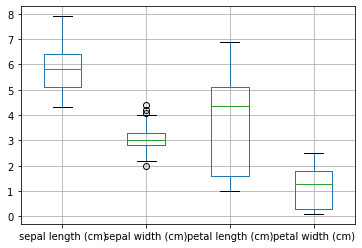

In [23]:
boxplots = iris_dataframe.boxplot(return_type='axes')

In [25]:
from scipy.stats import ttest_ind
group0 = iris_dataframe['group'] == 'setosa'
group1 = iris_dataframe['group'] == 'versicolor'
group2 = iris_dataframe['group'] == 'virginica'
print('var1 %0.3f var2 %03f' % (iris_dataframe['petal length (cm)'][group1].var(),iris_dataframe['petal length (cm)'][group2].var()))

var1 0.221 var2 0.304588


In [26]:
t, pvalue = ttest_ind(iris_dataframe['sepal width (cm)'][group1], iris_dataframe['sepal width (cm)'][group2], axis=0, equal_var=False)
print('t statistic %0.3f p-value %0.3f' % (t, pvalue))

t statistic -3.206 p-value 0.002


In [27]:
from scipy.stats import f_oneway
f, pvalue = f_oneway(iris_dataframe['sepal width (cm)'][group0],iris_dataframe['sepal width (cm)'][group1],iris_dataframe['sepal width (cm)'][group2])
print("One-way ANOVA F-value %0.3f p-value %0.3f" % (f,pvalue))

One-way ANOVA F-value 49.160 p-value 0.000


In [30]:
from pandas.plotting import parallel_coordinates
iris_dataframe['labels'] = [iris.target_names[k] for k in iris_dataframe['group']]
pll = parallel_coordinates(iris_dataframe,'labels')
densityplot = iris_dataframe[iris_dataframe.columns[:4]].plot(kind='density’) 
single_distribution = iris_dataframe['petal length (cm)'].plot(kind='hist')

SyntaxError: ignored

In [34]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0: "red", 1: "yellow", 2: "blue"}
colors = [colors_palette[c] for c in iris_dataframe['group’]] 
matrix_of_scatterplots = scatter_matrix(iris_dataframe, figsize=(6, 6), color=colors, diagonal='kde')

SyntaxError: ignored

In [36]:
print(iris_dataframe.cov())
print(iris_dataframe.corr())

                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)           0.685694  ...          0.516271
sepal width (cm)           -0.042434  ...         -0.121639
petal length (cm)           1.274315  ...          1.295609
petal width (cm)            0.516271  ...          0.581006

[4 rows x 4 columns]
                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.817941
sepal width (cm)           -0.117570  ...         -0.366126
petal length (cm)           0.871754  ...          0.962865
petal width (cm)            0.817941  ...          1.000000

[4 rows x 4 columns]


In [37]:
from scipy.stats import spearmanr
from scipy.stats.stats import pearsonr
spearmanr_coef, spearmanr_p = spearmanr(iris_dataframe['sepal length (cm)'],iris_dataframe['sepal width (cm)'])
pearsonr_coef, pearsonr_p = pearsonr(iris_dataframe['sepal length (cm)'],iris_dataframe['sepal width (cm)'])
print ('Pearson correlation %0.3f | Spearman correlation %0.3f' % (pearsonr_coef,spearmanr_coef))

Pearson correlation -0.118 | Spearman correlation -0.167


In [38]:
from scipy.stats import chi2_contingency
table = pd.crosstab(iris_dataframe['group'], iris_binned['petal length (cm)']) 
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square %0.2f p-value %0.3f' % (chi2, p))

Chi-square 212.43 p-value 0.000


In [39]:
from sklearn.preprocessing import scale
stand_sepal_width = scale(iris_dataframe['sepal width (cm)'])